In [14]:
pip install pysus

  Using cached pysus-0.9.4-py3-none-any.whl (1.3 MB)
  Using cached geobr-0.2.0-py2.py3-none-any.whl (34 kB)
  Using cached jupyterlab-3.6.5-py3-none-any.whl (8.9 MB)
  Using cached geocoder-1.38.1-py2.py3-none-any.whl (98 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.8/567.8 kB 6.4 MB/s eta 0:00:0000:0100:01
  Using cached elasticsearch-7.16.2-py2.py3-none-any.whl (385 kB)
  Using cached Unidecode-1.3.6-py3-none-any.whl (235 kB)
  Using cached tqdm-4.64.0-py2.py3-none-any.whl (78 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 7.3 MB/s eta 0:00:0000:0100:01
  Using cached dbfread-2.0.7-py2.py3-none-any.whl (20 kB)
  Using cached ipykernel-6.25.2-py3-none-any.whl (154 kB)
  Using cached pyreaddbc-1.0.0.tar.gz (43 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached loguru-0.6.0-py3-none-any.whl (58 kB)
  Using cached pytz-2022.2.1-py2.py3-none-any.whl (500 kB)
  Us

In [16]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 19.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 15.2 MB/s eta 0:00:00a 0:00:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 23.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.4/229.4 kB 19.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 4.6 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
from pysus.online_data.sinasc import download
from pysus.online_data import parquets_to_dataframe
from pysus.online_data import SINAN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('/Users/walterjr/Downloads/violencia_2009_2021.csv', encoding='latin-1')


/var/folders/44/gdyjz8bd5wlfg2tz2wvx4mg40000gn/T/ipykernel_2297/204106022.py:1: DtypeWarning: Columns (19,22,34,37,50,60,61,67,79,81,87,89,93,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/walterjr/Downloads/violencia_2009_2021.csv', encoding='latin-1')


In [11]:
df.head()

,Unnamed: 0,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_UNIDADE,DT_OCOR,...,CONS_IDO,DELEG_IDOS,DIR_HUMAN,MPU,DELEG_CRIA,DELEG_MULH,DELEG,INFAN_JUV,DEFEN_PUBL,DT_ENCERRA
0,0,2,Y09,2009-05-12,200919.0,2009.0,41,412550,2753278.0,20090512.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20090512.0
1,1,2,Y09,2009-12-01,200948.0,2009.0,29,290270,2301687.0,20091201.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20091201.0
2,2,2,Y09,2009-01-22,200903.0,2009.0,52,520870,2338262.0,20090122.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20090122.0
3,3,2,Y09,2009-03-01,200909.0,2009.0,13,130356,2708930.0,20090301.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20090301.0
4,4,2,Y09,2009-06-30,200926.0,2009.0,26,260290,5581923.0,20090630.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20090716.0


In [12]:
df.describe()
numero_de_nans = df.isna().sum()
df = df.fillna(' ')
df = df.drop_duplicates()


In [13]:
df['ASSIST_SOC'].info()

mapeamento = {2.0: 'não', 1.0: 'sim', 9.0: 'ignorado'}
df['ASSIST_SOC'] = df['ASSIST_SOC'].replace(mapeamento)
df['ASSIST_SOC'].tail(20)

contagem_não = df['ASSIST_SOC'].str.count('não').sum()
contagem_sim = df['ASSIST_SOC'].str.count('sim').sum()

# Agrupamento por ano de nas e assist_soc =1
df = df[df['ANO_NASC'] != ' ']
df['ANO_NASC'] = df['ANO_NASC'].astype(int)
df['ANO_NASC'].info()

df = df[df['ANO_NASC'] >= 1800]
df1 = df[df['ASSIST_SOC'] == 'sim']
df2 = df[df['ASSIST_SOC'] == 'não']
grouped1 = df1.groupby('ANO_NASC').size().reset_index(name='COUNT')
grouped2 = df2.groupby('ANO_NASC').size().reset_index(name='COUNT')




<class 'pandas.core.series.Series'>
Int64Index: 3035965 entries, 0 to 3035964
Series name: ASSIST_SOC
Non-Null Count    Dtype 
--------------    ----- 
3035965 non-null  object
dtypes: object(1)
memory usage: 46.3+ MB
<class 'pandas.core.series.Series'>
Int64Index: 2958142 entries, 0 to 3035964
Series name: ANO_NASC
Non-Null Count    Dtype
--------------    -----
2958142 non-null  int64
dtypes: int64(1)
memory usage: 45.1 MB


### Tiveram assist social

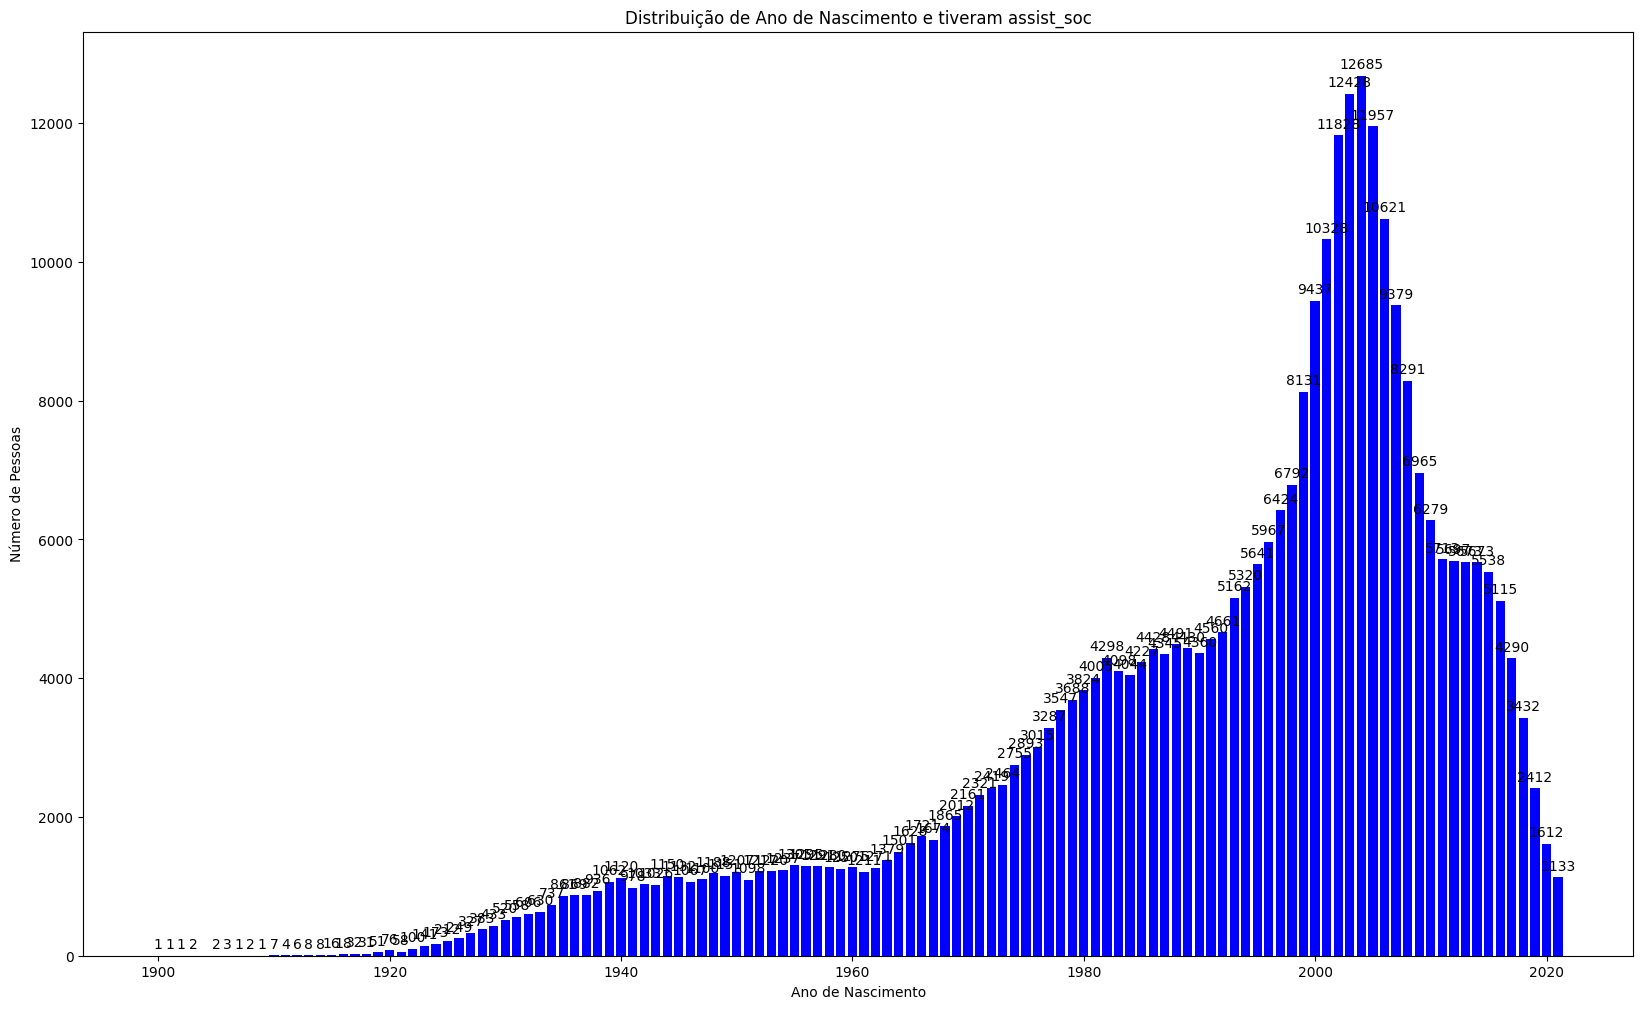

In [14]:
# Criar o gráfico de barras
plt.figure(figsize=(20, 12))
bars = plt.bar(grouped1['ANO_NASC'], grouped1['COUNT'], color='blue')

# Adicionar rótulos e título
plt.xlabel('Ano de Nascimento')
plt.ylabel('Número de Pessoas')
plt.title('Distribuição de Ano de Nascimento e tiveram assist_soc')

# Adicionar os valores do eixo y acima das barras
for bar in bars:
    yval = bar.get_height()
    plt.annotate(f'{yval:.0f}', xy=(bar.get_x() + bar.get_width() / 2, yval), xytext=(0, 3), 
                 textcoords='offset points', ha='center', va='bottom')

# Mostrar o gráfico
plt.show()

In [15]:
### Não tiveram assist social


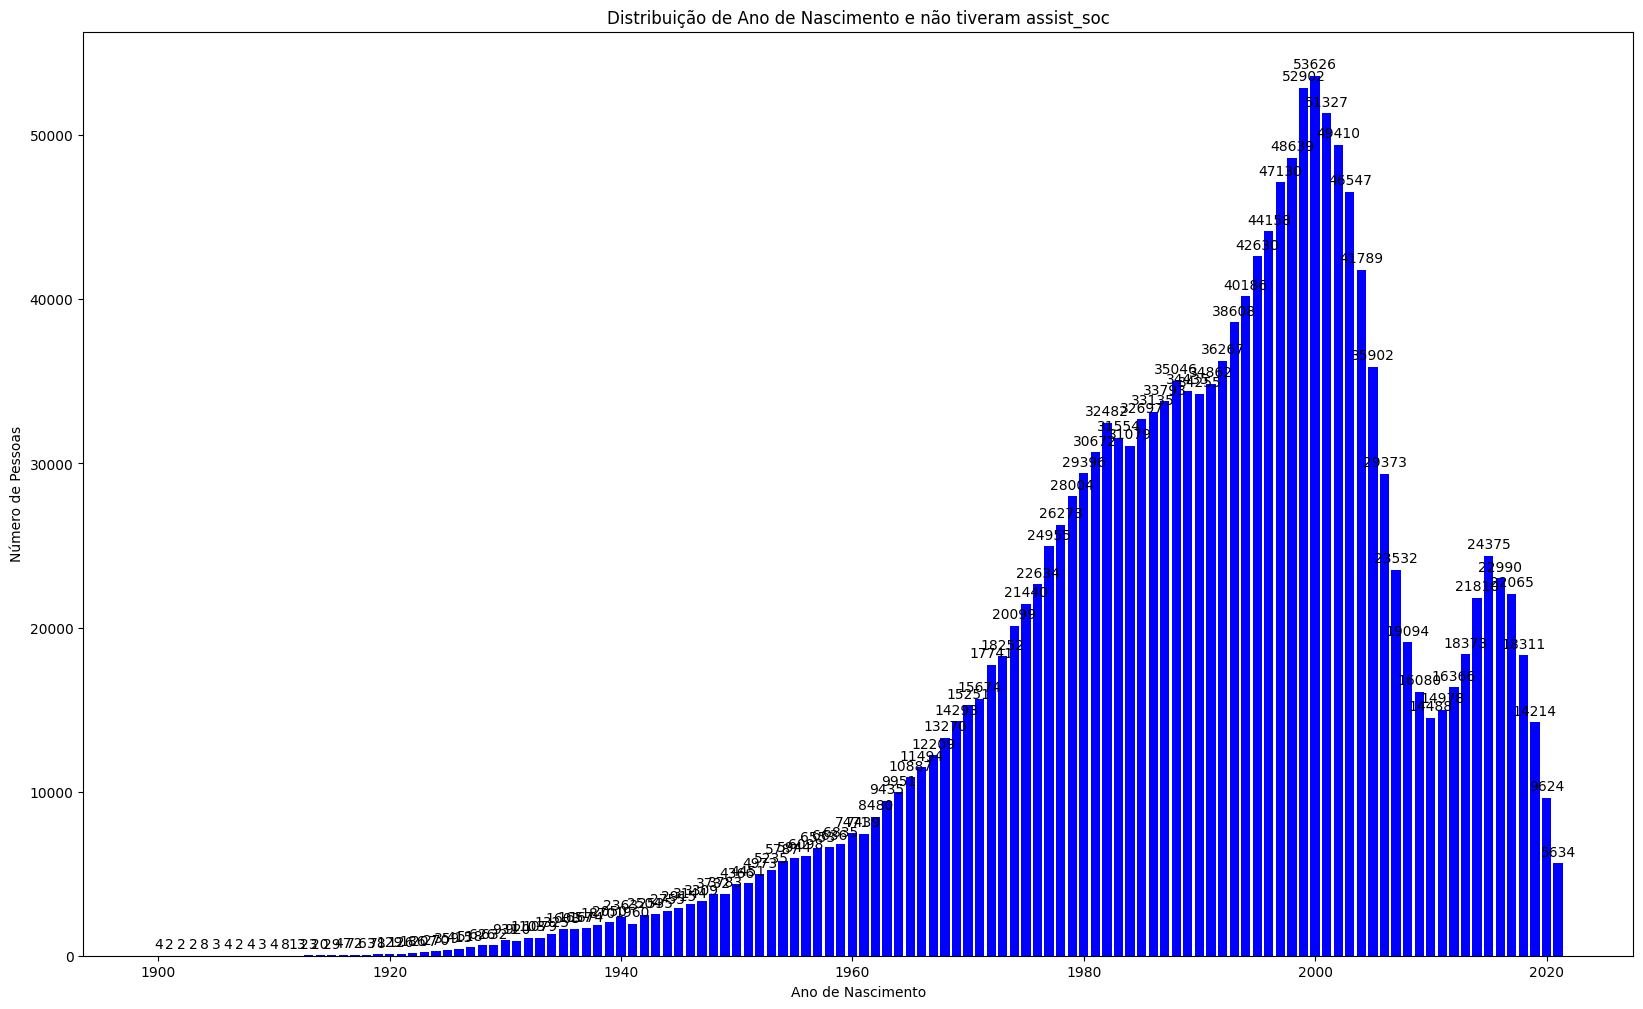

In [16]:
# Criar o gráfico de barras
plt.figure(figsize=(20, 12))
bars = plt.bar(grouped2['ANO_NASC'], grouped2['COUNT'], color='blue')

# Adicionar rótulos e título
plt.xlabel('Ano de Nascimento')
plt.ylabel('Número de Pessoas')
plt.title('Distribuição de Ano de Nascimento e não tiveram assist_soc')

# Adicionar os valores do eixo y acima das barras
for bar in bars:
    yval = bar.get_height()
    plt.annotate(f'{yval:.0f}', xy=(bar.get_x() + bar.get_width() / 2, yval), xytext=(0, 3), 
                 textcoords='offset points', ha='center', va='bottom')

# Mostrar o gráfico
plt.show()

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2958141 entries, 0 to 3035964
Columns: 161 entries, Unnamed: 0 to DT_ENCERRA
dtypes: int64(5), object(156)
memory usage: 3.6+ GB


In [17]:
pd.options.display.max_columns = None

In [18]:
df.head()

,Unnamed: 0,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_UNIDADE,DT_OCOR,SEM_PRI,ANO_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_MN_RESI,ID_PAIS,NDUPLIC,DT_INVEST,ID_OCUPA_N,SIT_CONJUG,DEF_TRANS,DEF_FISICA,DEF_MENTAL,DEF_VISUAL,DEF_AUDITI,TRAN_MENT,TRAN_COMP,DEF_OUT,DEF_ESPEC,SG_UF_OCOR,ID_MN_OCOR,HORA_OCOR,LOCAL_OCOR,LOCAL_ESPE,OUT_VEZES,LES_AUTOP,VIOL_FISIC,VIOL_PSICO,VIOL_TORT,VIOL_SEXU,VIOL_TRAF,VIOL_FINAN,VIOL_NEGLI,VIOL_INFAN,VIOL_LEGAL,VIOL_OUTR,VIOL_ESPEC,AG_FORCA,AG_ENFOR,AG_OBJETO,AG_CORTE,AG_QUENTE,AG_ENVEN,AG_FOGO,AG_AMEACA,AG_OUTROS,AG_ESPEC,SEX_ASSEDI,SEX_ESTUPR,SEX_PUDOR,SEX_PORNO,SEX_EXPLO,SEX_OUTRO,SEX_ESPEC,PEN_ORAL,PEN_ANAL,PEN_VAGINA,PROC_DST,PROC_HIV,PROC_HEPB,PROC_SANG,PROC_SEMEN,PROC_VAGIN,PROC_CONTR,PROC_ABORT,CONS_ABORT,CONS_GRAV,CONS_DST,CONS_SUIC,CONS_MENT,CONS_COMP,CONS_ESTRE,CONS_OUTR,CONS_ESPEC,LESAO_NAT,LESAO_ESPE,LESAO_CORP,NUM_ENVOLV,REL_SEXUAL,REL_PAI,REL_MAE,REL_PAD,REL_CONJ,REL_EXCON,REL_NAMO,REL_EXNAM,REL_FILHO,REL_DESCO,REL_IRMAO,REL_CONHEC,REL_CUIDA,REL_PATRAO,REL_INST,REL_POL,REL_PROPRI,REL_OUTROS,REL_ESPEC,AUTOR_SEXO,AUTOR_ALCO,ENC_SAUDE,ENC_TUTELA,ENC_VARA,ENC_ABRIGO,ENC_SENTIN,ENC_DEAM,ENC_DPCA,ENC_DELEG,ENC_MPU,ENC_MULHER,ENC_CREAS,ENC_IML,ENC_OUTR,ENC_ESPEC,REL_TRAB,REL_CAT,CIRC_LESAO,CLASSI_FIN,EVOLUCAO,DT_OBITO,DT_DIGITA,DT_TRANSUS,DT_TRANSDM,DT_TRANSSM,DT_TRANSRM,DT_TRANSRS,DT_TRANSSE,REL_MAD,TPUNINOT,ORIENT_SEX,IDENT_GEN,VIOL_MOTIV,CICL_VID,REDE_SAU,ASSIST_SOC,REDE_EDUCA,ATEND_MULH,CONS_TUTEL,CONS_IDO,DELEG_IDOS,DIR_HUMAN,MPU,DELEG_CRIA,DELEG_MULH,DELEG,INFAN_JUV,DEFEN_PUBL,DT_ENCERRA
0,0,2,Y09,2009-05-12,200919.0,2009.0,41,412550,2753278.0,20090512.0,200919.0,2004,4004.0,F,6.0,1.0,10.0,41.0,412550.0,1,,,,8.0,2.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,,41.0,412550,,1.0,,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,,8.0,8.0,8.0,8.0,8.0,8.0,,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,,4.0,,1.0,1.0,8.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,,2.0,8.0,Y09,1.0,9.0,,20090625.0,,,,,,20100430.0,2.0,,,,,,,,,,,,,,,,,,,,20090512.0
1,1,2,Y09,2009-12-01,200948.0,2009.0,29,290270,2301687.0,20091201.0,200948.0,1980,4029.0,F,5.0,2.0,6.0,29.0,292160.0,1,,,,2.0,2.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,,29.0,292160,09:00,7.0,,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,,1.0,1.0,2.0,2.0,1.0,2.0,,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,9.0,9.0,9.0,2.0,2.0,2.0,1.0,2.0,,11.0,VAGINAL,10.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,,1.0,9.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,CTA,1.0,9.0,Y09,1.0,1.0,,20091215.0,,,,,,,2.0,,,,,,,,,,,,,,,,,,,,20091201.0
2,2,2,Y09,2009-01-22,200903.0,2009.0,52,520870,2338262.0,20090122.0,200903.0,1980,4066.0,F,9.0,9.0,9.0,52.0,522045.0,1,,,,9.0,9.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,,52.0,520000,,99.0,,9.0,9.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,,8.0,,8.0,8.0,8.0,8.0,,8.0,8.0,,8.0,8.0,8.0,8.0,8.0,,,,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,,8.0,,1.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,,9.0,9.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,1.0,HOSP SAO DOMINGOS,9.0,8.0,,1.0,1.0,,20090522.0,,,20100310.0,,20100326.0,,9.0,,,,,,,,,,,,,,,,,,,,20090122.0
4,4,2,Y09,2009-06-30,200926.0,2009.0,26,260290,5581923.0,20090630.0,200926.0,2009,3004.0,F,6.0,4.0,10.0,26.0,260290.0,1,,,,8.0,2.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,,26.0,260290,,1.0,,2.0,2.0,1.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,,8.0,8.0,8.0,8.0,8.0,8.0,,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,9.0,9.0,9.0,9.0,9.0,9.0,,1.0,,1.0,1.0,8.0,9.0,1.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,,2.0,2.0,9.0,1.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,,2.0,8.0,,1.0,9.0,,20090716.0,,,,,,,9.0,,,,,,,,,,,,,,,,,,,,20090716.0
5,5,2,Y09,2009-06-

In [ ]:
### VIOL_INFAN

In [30]:

print('início')
df['VIOL_INFAN'].info()

mapeamento = {2.0: 'não', 1.0: 'sim', 9.0: 'ignorado'}
df['VIOL_INFAN'] = df['VIOL_INFAN'].replace(mapeamento)
df['VIOL_INFAN'].tail(20)

contagem_não = df['VIOL_INFAN'].str.count('não').sum()
contagem_sim = df['VIOL_INFAN'].str.count('sim').sum()

# Agrupamento por ano de nas e assist_soc =1
df = df[df['ANO_NASC'] != ' ']
df['ANO_NASC'] = df['ANO_NASC'].astype(int)
df['ANO_NASC'].info()

df = df[df['ANO_NASC'] >= 1800]
df3 = df[df['VIOL_INFAN'] == 'sim']
df4= df[df['VIOL_INFAN']  == 'não']
grouped3 = df3.groupby('ANO_NASC').size().reset_index(name='COUNT')
grouped4 = df4.groupby('ANO_NASC').size().reset_index(name='COUNT')

print('final')

início
<class 'pandas.core.series.Series'>
Int64Index: 2958141 entries, 0 to 3035964
Series name: VIOL_INFAN
Non-Null Count    Dtype 
--------------    ----- 
2958141 non-null  object
dtypes: object(1)
memory usage: 45.1+ MB
<class 'pandas.core.series.Series'>
Int64Index: 2958141 entries, 0 to 3035964
Series name: ANO_NASC
Non-Null Count    Dtype
--------------    -----
2958141 non-null  int64
dtypes: int64(1)
memory usage: 45.1 MB
final


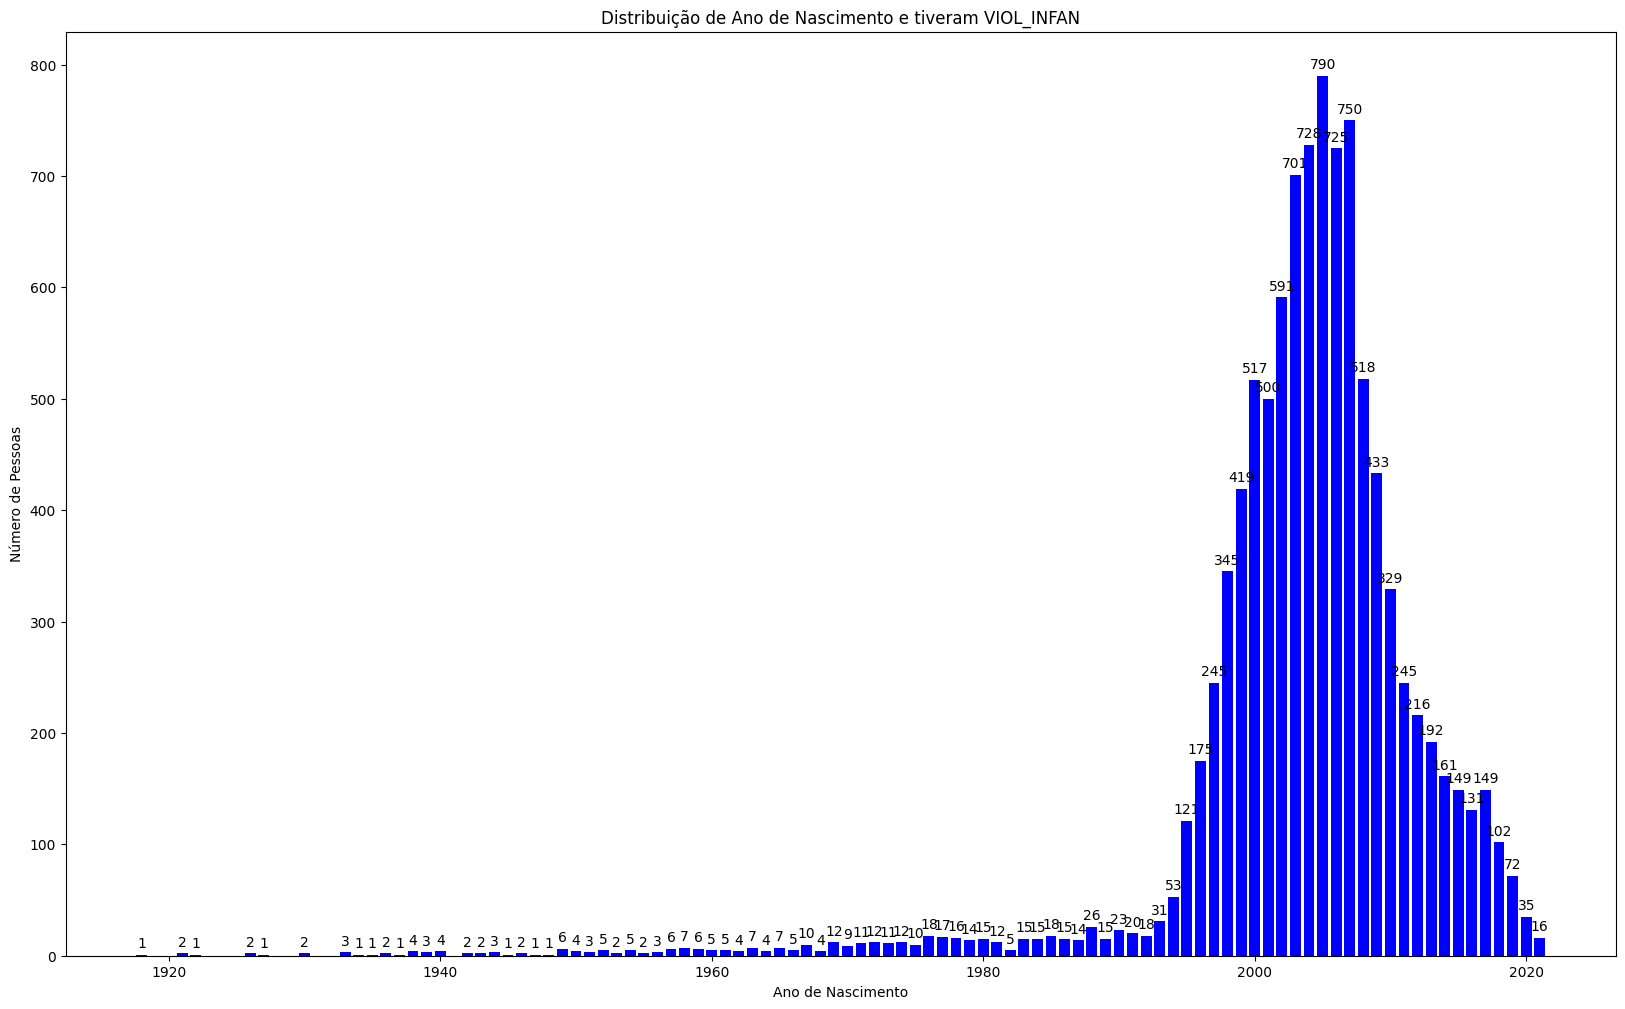

In [36]:
# Criar o gráfico de barras

plt.figure(figsize=(20, 12))
bars = plt.bar(grouped3['ANO_NASC'], grouped3['COUNT'], color='blue')

# Adicionar rótulos e título
plt.xlabel('Ano de Nascimento')
plt.ylabel('Número de Pessoas')
plt.title('Distribuição de Ano de Nascimento e tiveram VIOL_INFAN')

# Adicionar os valores do eixo y acima das barras
for bar in bars:
    yval = bar.get_height()
    plt.annotate(f'{yval:.0f}', xy=(bar.get_x() + bar.get_width() / 2, yval), xytext=(0, 3), 
                 textcoords='offset points', ha='center', va='bottom')

# Mostrar o gráfico
plt.show()

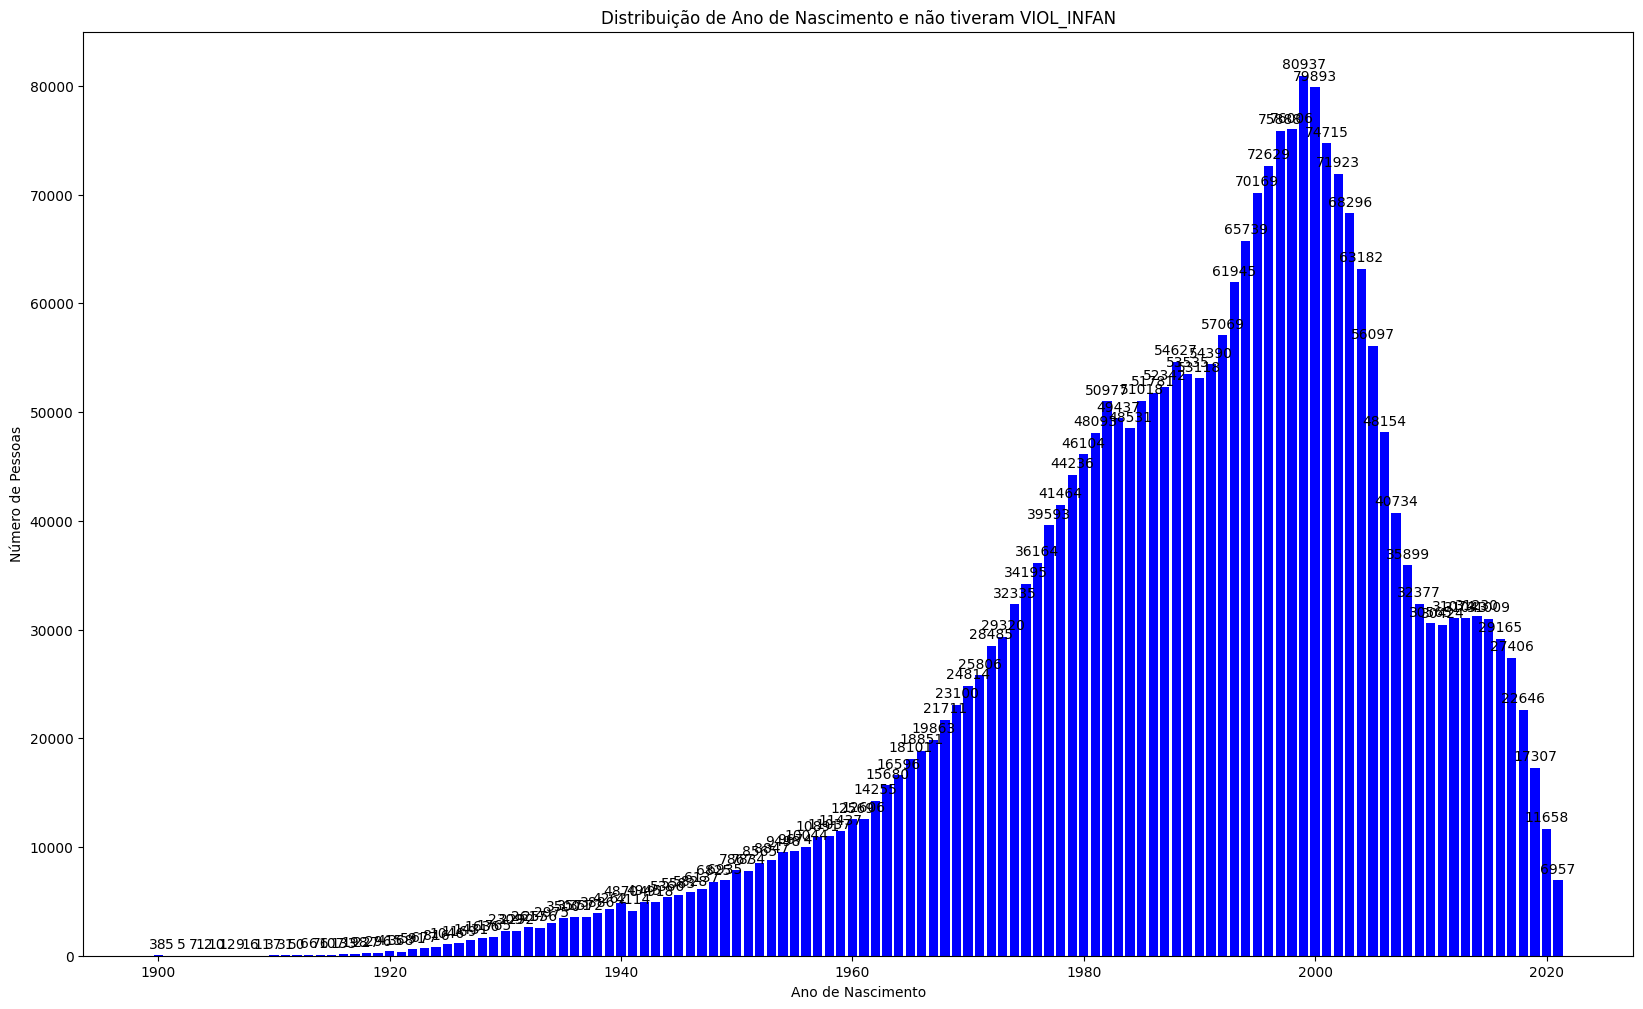

In [23]:
# Criar o gráfico de barras
plt.figure(figsize=(20, 12))
bars = plt.bar(grouped2['ANO_NASC'], grouped4['COUNT'], color='blue')

# Adicionar rótulos e título
plt.xlabel('Ano de Nascimento')
plt.ylabel('Número de Pessoas')
plt.title('Distribuição de Ano de Nascimento e não tiveram VIOL_INFAN')

# Adicionar os valores do eixo y acima das barras
for bar in bars:
    yval = bar.get_height()
    plt.annotate(f'{yval:.0f}', xy=(bar.get_x() + bar.get_width() / 2, yval), xytext=(0, 3), 
                 textcoords='offset points', ha='center', va='bottom')

# Mostrar o gráfico
plt.show()